In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold

In [2]:
df = pd.read_csv('Feature_Engineering.csv')

In [3]:
df.head()

,RowNumber,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,-0.326205,France,Female,0.293503,0.2,-1.225786,1,1,1,0.506735,1
1,2,-0.440014,Spain,Female,0.198154,0.1,0.117344,1,0,1,0.562709,0
2,3,-1.536717,France,Female,0.293503,0.8,1.332987,3,1,0,0.569654,1
3,4,0.501496,France,Female,0.007456,0.1,-1.225786,2,0,0,0.469120,0
4,5,2.063781,Spain,Female,0.388852,0.2,0.785689,1,1,1,0.395400,0


# Feature selection using Filter methods
### Constant method
### Quasi Constant method
### Duplicate removal
### Pearson Coefficient

## Sepearating the variables


In [4]:
numericColumns = ['CreditScore' , 'Age', 'Tenure', 'Balance',  'EstimatedSalary']
categoryColumns = ['Geography', 'Gender','NumOfProducts', 'HasCrCard', 'IsActiveMember']

#### Constant method

In [5]:
const_numeric = VarianceThreshold(threshold=0)
const_numeric.fit(df[numericColumns])

VarianceThreshold(threshold=0)

In [6]:
const_numeric.variances_

array([0.9999    , 0.9999    , 0.08363836, 0.9999    , 0.08269394])

##### there are no features to be removed using constant method

#### Quasi constant method

In [7]:
quasi_const_numeric = VarianceThreshold(threshold=0.02) # can have custom thrshold
quasi_const_numeric.fit(df[numericColumns])


VarianceThreshold(threshold=0.02)

In [8]:
quasi_const_numeric.get_support().sum()
#quasi_const_numeric.threshold

5

##### Remove duplicates

In [9]:
df_T = df.T

In [10]:
df_T = pd.DataFrame(df_T)
df_T.duplicated()

RowNumber          False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

###### there are no duplicates 

#### Using Pearson correlation

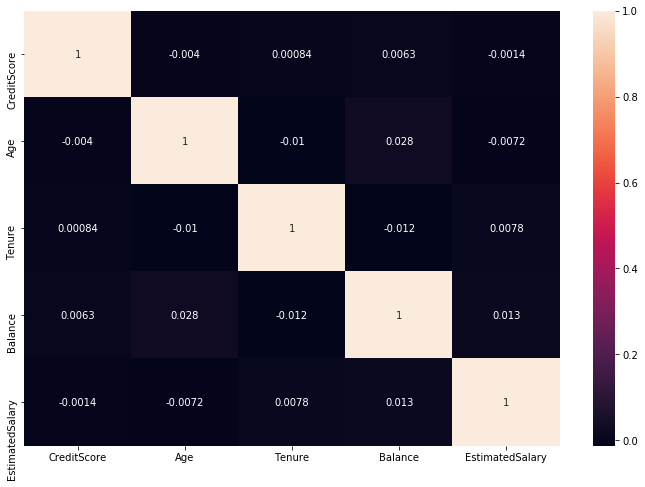

In [11]:
df_corr = df[numericColumns].corr()
plt.figure(figsize=(12,8))
sns.heatmap(df_corr,annot=True)

In [12]:
def get_correlation_features(threshold):
    correlated_features = set()
    for i in range(len(df_corr.columns)):
        for j in range(i):
            if(abs(df_corr.iloc[i,j])>threshold):
                corr_column = df_corr.columns[i]
                correlated_features.add(corr_column)
    return correlated_features
            
        

In [13]:
corr_features = get_correlation_features(0.01)
list(corr_features)

['EstimatedSalary', 'Balance']

##### here we can remove EstimatedSalary and Balance from the dataset

In [14]:
filter1 = df.drop(['EstimatedSalary','Balance'],axis=1)
filter1.to_csv('filter1.csv',index=False)

### Feature grouping and feature importance

In [15]:
df_corr

,CreditScore,Age,Tenure,Balance,EstimatedSalary
CreditScore,1.000000,-0.003965,0.000842,0.006268,-0.001384
Age,-0.003965,1.000000,-0.009997,0.028308,-0.007201
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.007784
Balance,0.006268,0.028308,-0.012254,1.000000,0.012797
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,1.000000


##### build vertical stack (we could see comparision of two features correlation)

In [16]:
corrdata = df_corr.abs().stack()
corrdata

CreditScore      CreditScore        1.000000
                 Age                0.003965
                 Tenure             0.000842
                 Balance            0.006268
                 EstimatedSalary    0.001384
Age              CreditScore        0.003965
                 Age                1.000000
                 Tenure             0.009997
                 Balance            0.028308
                 EstimatedSalary    0.007201
Tenure           CreditScore        0.000842
                 Age                0.009997
                 Tenure             1.000000
                 Balance            0.012254
                 EstimatedSalary    0.007784
Balance          CreditScore        0.006268
                 Age                0.028308
                 Tenure             0.012254
                 Balance            1.000000
                 EstimatedSalary    0.012797
EstimatedSalary  CreditScore        0.001384
                 Age                0.007201
          

In [17]:
corrdata = corrdata.sort_values(ascending=False)
corrdata

EstimatedSalary  EstimatedSalary    1.000000
Balance          Balance            1.000000
Age              Age                1.000000
Tenure           Tenure             1.000000
CreditScore      CreditScore        1.000000
Balance          Age                0.028308
Age              Balance            0.028308
Balance          EstimatedSalary    0.012797
EstimatedSalary  Balance            0.012797
Tenure           Balance            0.012254
Balance          Tenure             0.012254
Tenure           Age                0.009997
Age              Tenure             0.009997
Tenure           EstimatedSalary    0.007784
EstimatedSalary  Tenure             0.007784
Age              EstimatedSalary    0.007201
EstimatedSalary  Age                0.007201
Balance          CreditScore        0.006268
CreditScore      Balance            0.006268
Age              CreditScore        0.003965
CreditScore      Age                0.003965
EstimatedSalary  CreditScore        0.001384
CreditScor

In [18]:
corrdata = corrdata[corrdata>0.01]

In [19]:
corrdata

EstimatedSalary  EstimatedSalary    1.000000
Balance          Balance            1.000000
Age              Age                1.000000
Tenure           Tenure             1.000000
CreditScore      CreditScore        1.000000
Balance          Age                0.028308
Age              Balance            0.028308
Balance          EstimatedSalary    0.012797
EstimatedSalary  Balance            0.012797
Tenure           Balance            0.012254
Balance          Tenure             0.012254
dtype: float64

In [20]:
df_corrdata = pd.DataFrame(corrdata.reset_index())
df_corrdata.columns = ["Feature1","Feature2","corr_value"]


In [21]:
df_corrdata

,Feature1,Feature2,corr_value
0,EstimatedSalary,EstimatedSalary,1.000000
1,Balance,Balance,1.000000
2,Age,Age,1.000000
3,Tenure,Tenure,1.000000
4,CreditScore,CreditScore,1.000000
5,Balance,Age,0.028308
6,Age,Balance,0.028308
7,Balance,EstimatedSalary,0.012797
8,EstimatedSalary,Balance,0.012797
9,Tenure,Balance,0.012254


##### get all the grouped features ex : if f1 is correlated with f2 , f3 ... make f1 ==> f2,f3 into a group

In [22]:
grouped_feature_list = []
corr_group_list =[]

for feature in df_corrdata.Feature1.unique():
    if feature not in grouped_feature_list:
        corr_block = df_corrdata[df_corrdata.Feature1 == feature]
        grouped_feature_list = grouped_feature_list + list(corr_block.Feature2.unique()) + [feature]
        corr_group_list.append(corr_block)

In [23]:
corr_group_list

[          Feature1         Feature2  corr_value
 0  EstimatedSalary  EstimatedSalary    1.000000
 8  EstimatedSalary          Balance    0.012797,
   Feature1 Feature2  corr_value
 2      Age      Age    1.000000
 6      Age  Balance    0.028308,
   Feature1 Feature2  corr_value
 3   Tenure   Tenure    1.000000
 9   Tenure  Balance    0.012254,
       Feature1     Feature2  corr_value
 4  CreditScore  CreditScore         1.0]

In [24]:
len(corr_group_list)

4

#### FEature importance based on random forest

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
important_features = []

for grp in corr_group_list:
    features = list(grp.Feature1.unique())+ list(grp.Feature2.unique())
    rf = RandomForestClassifier(n_estimators=100,random_state=0)
    rf.fit(df[features],df['Exited'])
    
    importance = pd.concat([pd.Series(features),pd.Series(rf.feature_importances_)],axis=1)
    importance.columns = ['features','importance']
    
    # get the most important feature
    importance.sort_values(by='importance',ascending=False,inplace=True)
    important_features.append(importance.iloc[0])

In [27]:
important_features

[features      EstimatedSalary
 importance           0.366376
 Name: 0, dtype: object, features       Balance
 importance    0.752383
 Name: 2, dtype: object, features       Balance
 importance    0.990574
 Name: 2, dtype: object, features      CreditScore
 importance       0.505628
 Name: 1, dtype: object]

In [28]:
important_features = pd.DataFrame(important_features)
important_features.reset_index(inplace=True)

In [29]:
important_features

,index,features,importance
0,0,EstimatedSalary,0.366376
1,2,Balance,0.752383
2,2,Balance,0.990574
3,1,CreditScore,0.505628


In [30]:
features_to_consider = set(important_features.features)

In [31]:
features_to_consider

{'Balance', 'CreditScore', 'EstimatedSalary'}

In [32]:
filter2 = df.drop(list(set(df.columns)- set(features_to_consider)),axis=1)

In [33]:
filter2.to_csv('filter2.csv')

## ANOVA test for Continuous  vs Category response

In [43]:
from sklearn.feature_selection import f_classif , f_regression

In [36]:
an = f_classif(df[numericColumns],df['Exited'])

In [46]:
p_values = an[1]
np.sort(p_values)

array([1.23993131e-186, 1.27556332e-032, 6.73821389e-003, 1.61526849e-001,
       2.26440428e-001])

##### take the columns which have higher the p value

In [47]:
categoryColumns

['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']

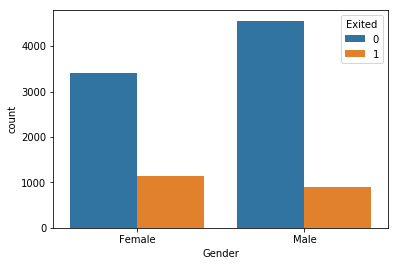

In [49]:
df[['Gender','Exited']]

sns.countplot(df.Gender , hue=df.Exited)

In [52]:
pd.crosstab(df['Gender'],df['Exited'])

Exited,0,1
Gender,,
Female,3404,1139
Male,4559,898


In [72]:
mi = df[['Gender','Exited']].head(400)

In [73]:
pd.crosstab(mi['Gender'],mi['Exited'])

Exited,0,1
Gender,,
Female,140,44
Male,178,38


In [74]:
categoryColumns

['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']

In [76]:
churn_df = df[['Geography', 'Gender', 'HasCrCard','IsActiveMember','Exited']]

In [80]:
churn_df.to_csv('bank.csv' , index=False)